In [1]:
from python_files.import_libs import *
from python_files.predict import *
%matplotlib inline

In [2]:
# Lendo a representação da conversa do objeto model_scores
res = pickle.load(open("model_scores.p", "rb"))
# Atualizando 'res' com a representação da conversa do objeto arima_model_scores
res.update(pickle.load(open("arima_model_scores.p", "rb")))
res_df = pd.DataFrame.from_dict(res, orient='index', columns=['RMSE', 'MAE','R2'])
res_df = res_df.sort_values(by='RMSE', ascending=False).reset_index()
    
results = res_df
results

,index,RMSE,MAE,R2
0,LinearRegression,26127.621967,16922.333333,-11.146057
1,XGBoost,22592.270511,14691.666667,-8.081452
2,LSTM,20074.209887,14380.583333,-6.169889
3,RandomForest,16255.080037,11439.666667,-3.701254
4,ARIMA,14305.679248,10401.782102,0.984970


C:\Users\mathe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mathe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mathe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


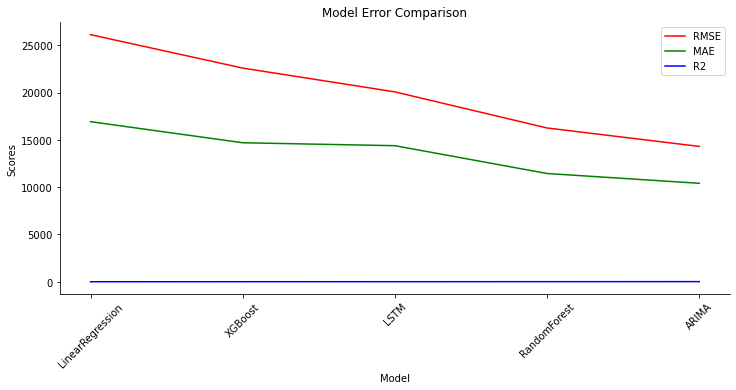

In [3]:
# Plot results
fig, ax = plt.subplots(figsize=(12, 5))
sns.lineplot(np.arange(len(results)), 'RMSE', data=results, ax=ax, label='RMSE', color='red')
sns.lineplot(np.arange(len(results)), 'MAE', data=results, ax=ax, label='MAE', color='green')
sns.lineplot(np.arange(len(results)), 'R2', data=results, ax=ax, label='R2', color='blue')
    
plt.xticks(np.arange(len(results)),rotation=45)
ax.set_xticklabels(results['index'])
ax.set(xlabel = "Model",
       ylabel = "Scores",
       title = "Model Error Comparison")
sns.despine()
    
plt.savefig(f'model_output/compare_models.png')